In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.shape

(103904, 25)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [27]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [28]:
df.shape

(103904, 25)

In [29]:
df.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [30]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [31]:
df[df['Arrival Delay in Minutes'].isna() & (df['satisfaction'] == 'satisfied')]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
2485,2485,121173,Female,Loyal Customer,28,Personal Travel,Eco,2370,4,5,...,3,5,4,4,5,4,3,3,NaN,satisfied
2630,2630,3638,Male,Loyal Customer,35,Business travel,Business,1534,1,1,...,5,5,5,5,5,5,5,0,NaN,satisfied
4041,4041,66091,Male,Loyal Customer,31,Business travel,Business,2490,1,1,...,4,3,5,5,4,4,4,6,NaN,satisfied
4588,4588,27120,Male,Loyal Customer,33,Business travel,Business,2701,3,3,...,5,4,5,5,2,5,5,0,NaN,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98946,98946,19609,Male,Loyal Customer,65,Business travel,Business,3663,3,3,...,4,4,4,4,5,4,5,1,NaN,satisfied
99814,99814,106022,Male,Loyal Customer,35,Business travel,Business,2658,1,1,...,4,4,4,4,5,4,3,29,NaN,satisfied
100426,100426,97901,Male,Loyal Customer,42,Business travel,Business,2803,1,1,...,5,5,5,5,4,5,3,4,NaN,satisfied
100682,100682,35764,Male,Loyal Customer,38,Business travel,Business,200,5,5,...,3,1,5,3,5,5,5,157,NaN,satisfied


In [32]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int32  
 1   Customer Type                      103904 non-null  int32  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int32  
 4   Class                              103904 non-null  int32  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [34]:
df.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3802
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            446
Arrival Delay in Minutes              455
satisfaction                            2
dtype: int64

In [38]:
bins = [7, 18, 30, 40, 50, 60, 70, 80, 85]
labels = ['7-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-85']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.drop(columns=['Age'], inplace=True)
df = pd.get_dummies(df, columns=['age_group'], prefix='age')

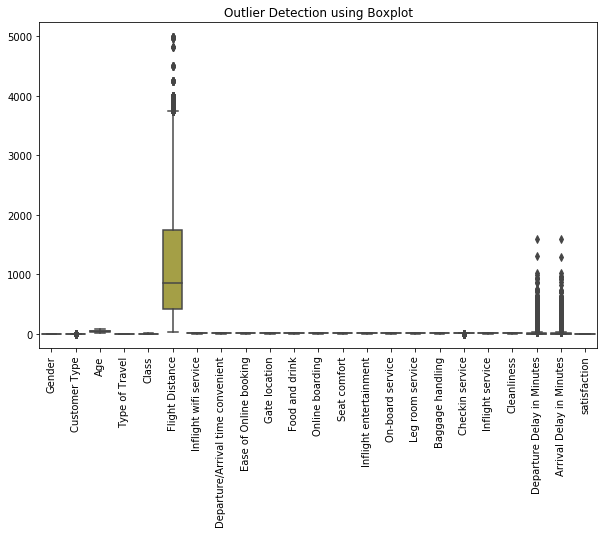


Outlier Summary:
----------------------------------------

Gender:
Number of outliers: 0
Percentage: 0.00%
Outlier range: < -1.50 or > 2.50

Customer Type:
Number of outliers: 18981
Percentage: 18.27%
Outlier range: < 0.00 or > 0.00

Age:
Number of outliers: 0
Percentage: 0.00%
Outlier range: < -9.00 or > 87.00

Type of Travel:
Number of outliers: 0
Percentage: 0.00%
Outlier range: < -1.50 or > 2.50

Class:
Number of outliers: 0
Percentage: 0.00%
Outlier range: < -1.50 or > 2.50

Flight Distance:
Number of outliers: 2291
Percentage: 2.20%
Outlier range: < -1579.50 or > 3736.50

Inflight wifi service:
Number of outliers: 0
Percentage: 0.00%
Outlier range: < -1.00 or > 7.00

Departure/Arrival time convenient:
Number of outliers: 0
Percentage: 0.00%
Outlier range: < -1.00 or > 7.00

Ease of Online booking:
Number of outliers: 0
Percentage: 0.00%
Outlier range: < -1.00 or > 7.00

Gate location:
Number of outliers: 0
Percentage: 0.00%
Outlier range: < -1.00 or > 7.00

Food and drink:
Numbe

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def plot_outliers(data, columns=None, figsize=(10,6)):
    """
    Simple function to visualize outliers using boxplots and print basic statistics.
    
    Parameters:
    -----------
    data : pandas DataFrame
        Input dataset
    columns : list, optional
        List of column names to analyze. If None, all numeric columns will be used.
    figsize : tuple, optional
        Figure size for the plot
    """
    
    # If no columns specified, use all numeric columns
    if columns is None:
        columns = data.select_dtypes(include=[np.number]).columns
    
    # Create boxplot
    plt.figure(figsize=figsize)
    sns.boxplot(data=data[columns])
    plt.xticks(rotation=90)
    plt.title('Outlier Detection using Boxplot')
    plt.show()
    
    # Print summary statistics
    print("\nOutlier Summary:")
    print("-" * 40)
    
    for column in columns:
        # Calculate bounds
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
        
        print(f"\n{column}:")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Percentage: {(len(outliers)/len(data))*100:.2f}%")
        print(f"Outlier range: < {lower_bound:.2f} or > {upper_bound:.2f}")

plot_outliers(df)


Column: Gender
Lower bound: -1.50
Upper bound: 2.50
Number of values capped: 0

Column: Customer Type
Lower bound: 0.00
Upper bound: 0.00
Number of values capped: 18981

Column: Age
Lower bound: -9.00
Upper bound: 87.00
Number of values capped: 0

Column: Type of Travel
Lower bound: -1.50
Upper bound: 2.50
Number of values capped: 0

Column: Class
Lower bound: -1.50
Upper bound: 2.50
Number of values capped: 0

Column: Flight Distance
Lower bound: -1579.50
Upper bound: 3736.50
Number of values capped: 2291

Column: Inflight wifi service
Lower bound: -1.00
Upper bound: 7.00
Number of values capped: 0

Column: Departure/Arrival time convenient
Lower bound: -1.00
Upper bound: 7.00
Number of values capped: 0

Column: Ease of Online booking
Lower bound: -1.00
Upper bound: 7.00
Number of values capped: 0

Column: Gate location
Lower bound: -1.00
Upper bound: 7.00
Number of values capped: 0

Column: Food and drink
Lower bound: -1.00
Upper bound: 7.00
Number of values capped: 0

Column: Onlin

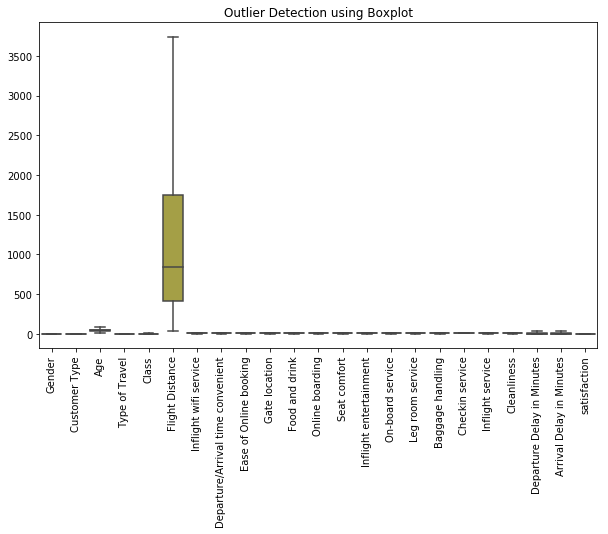


Outlier Summary:
----------------------------------------

Gender:
Number of outliers: 0
Percentage: 0.00%
Outlier range: < -1.50 or > 2.50

Customer Type:
Number of outliers: 0
Percentage: 0.00%
Outlier range: < 0.00 or > 0.00

Age:
Number of outliers: 0
Percentage: 0.00%
Outlier range: < -9.00 or > 87.00

Type of Travel:
Number of outliers: 0
Percentage: 0.00%
Outlier range: < -1.50 or > 2.50

Class:
Number of outliers: 0
Percentage: 0.00%
Outlier range: < -1.50 or > 2.50

Flight Distance:
Number of outliers: 0
Percentage: 0.00%
Outlier range: < -1579.50 or > 3736.50

Inflight wifi service:
Number of outliers: 0
Percentage: 0.00%
Outlier range: < -1.00 or > 7.00

Departure/Arrival time convenient:
Number of outliers: 0
Percentage: 0.00%
Outlier range: < -1.00 or > 7.00

Ease of Online booking:
Number of outliers: 0
Percentage: 0.00%
Outlier range: < -1.00 or > 7.00

Gate location:
Number of outliers: 0
Percentage: 0.00%
Outlier range: < -1.00 or > 7.00

Food and drink:
Number of out

In [66]:
def cap_outliers(data, columns=None, method='iqr', threshold=1.5):
    """
    Cap outliers in specified columns of a dataframe.
    
    Parameters:
    -----------
    data : pandas DataFrame
        Input dataset
    columns : list, optional
        List of column names to cap. If None, all numeric columns will be used.
    method : str, optional
        'iqr' for Interquartile Range method
        'std' for Standard Deviation method
    threshold : float, optional
        For IQR method: multiplier for IQR (default 1.5)
        For STD method: number of standard deviations (default 1.5)
    
    Returns:
    --------
    pandas DataFrame
        DataFrame with capped outliers
    """
    
    # Create a copy of the dataframe
    df = data.copy()
    
    # If no columns specified, use all numeric columns
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    for column in columns:
        if method.lower() == 'iqr':
            # IQR method
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
        elif method.lower() == 'std':
            # Standard deviation method
            mean = df[column].mean()
            std = df[column].std()
            lower_bound = mean - threshold * std
            upper_bound = mean + threshold * std
            
        else:
            raise ValueError("Method must be either 'iqr' or 'std'")
        
        # Cap the outliers
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        
        # Print summary
        print(f"\nColumn: {column}")
        print(f"Lower bound: {lower_bound:.2f}")
        print(f"Upper bound: {upper_bound:.2f}")
        print(f"Number of values capped: {len(data[data[column].between(lower_bound, upper_bound) == False])}")
    
    return df

df_capped = cap_outliers(df)
plot_outliers(df_capped)

In [36]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1000)
imputed_data = imputer.fit_transform(df)
df = pd.DataFrame(imputed_data, columns=df.columns)

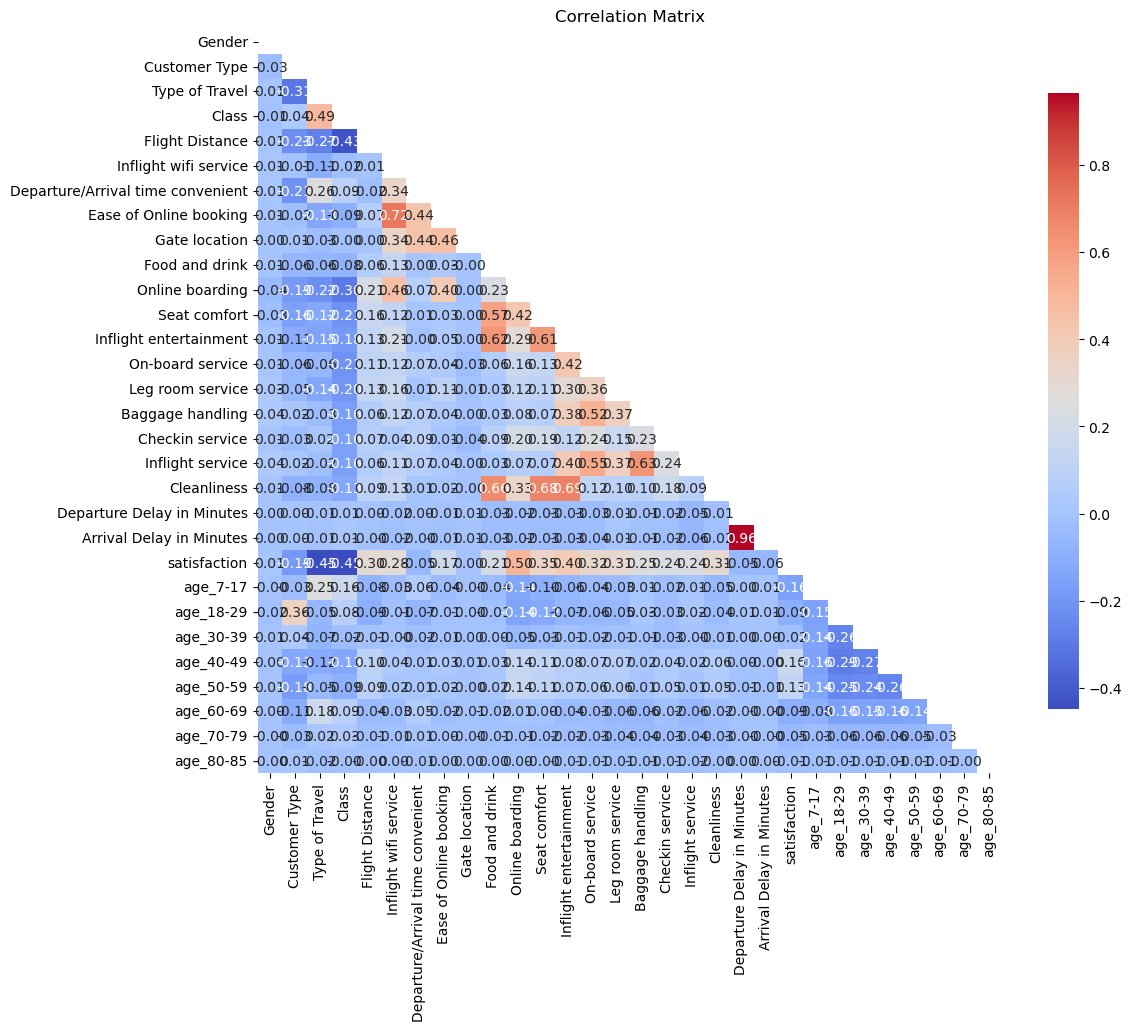

In [39]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

def create_poly_remove_corr(df, degree=2, corr_threshold=0.8):
    """
    Creates polynomial features and removes highly correlated ones
    """
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(df)
    
    try:
        feature_names = poly.get_feature_names_out(input_features=df.columns)
    except AttributeError:
        feature_names = poly.get_feature_names(input_features=df.columns)
    
    poly_df = pd.DataFrame(
        poly_features, 
        columns=feature_names
    )

    corr_matrix = poly_df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > corr_threshold)]
    
    return poly_df.drop(columns=to_drop)


X = df.drop(columns=['satisfaction'])
y = df['satisfaction']
X = create_poly_remove_corr(X, degree=2, corr_threshold=0.8)

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale after splitting to prevent data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# If you want to convert back to dataframe with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [73]:
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def objective(trial):
    """Define the objective function for Optuna to optimize"""
    
    # Define hyperparameters to optimize
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'learning_rate': trial.suggest_int('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'subsample': trial.suggest_int('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_int('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_int('gamma', 0, 5),
        'random_state': 42
    }
    
    # Create and train model
    model = xgb.XGBClassifier(**param)
    
    # Calculate cross-validation score
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    return scores.mean()

# Create and run study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Adjust n_trials as needed

# Print optimization results
print("Best parameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)

# Train final model with best parameters
best_model = xgb.XGBClassifier(**study.best_params)
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("\nTest Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
# import matplotlib.pyplot as plt

# xgb_model = xgb.XGBClassifier(
#     max_depth= 7, 
#     learning_rate=0.06076964731811467, 
#     n_estimators=284, 
#     min_child_weight=1, 
#     subsample=0.8953411503288929, 
#     colsample_bytree=0.8491742219137619, 
#     gamma=1.7020101393621636,
# )

# xgb_model.fit(X_train, y_train)
# xgb_pred = xgb_model.predict(X_test)

# print("XGBoost Results:")
# print("Accuracy:", accuracy_score(y_test, xgb_pred))
# print("\nClassification Report:")
# print(classification_report(y_test, xgb_pred))
# print("ROC AUC:", roc_auc_score(y_test, xgb_pred))

# from sklearn.ensemble import RandomForestClassifier

# rf_model = RandomForestClassifier(
#     n_estimators=200,
#     max_depth=7,
#     min_samples_split=5,
#     random_state=42,
#     n_jobs=-1
# )

# rf_model.fit(X_train, y_train)
# rf_pred = rf_model.predict(X_test)

# print("Random Forest Results:")
# print("Accuracy:", accuracy_score(y_test, rf_pred))
# print("\nClassification Report:")
# print(classification_report(y_test, rf_pred))
# print("ROC AUC:", roc_auc_score(y_test, rf_pred))

# # Feature importance plot for RF
# plt.figure(figsize=(10, 6))
# importances = pd.DataFrame({'features': X_train.columns, 
#                           'importance': rf_model.feature_importances_})
# importances = importances.sort_values('importance', ascending=False)
# plt.bar(importances['features'][:10], importances['importance'][:10])
# plt.xticks(rotation=45)
# plt.title('Random Forest Feature Importance')
# plt.show()

# # LightGBM
# import lightgbm as lgb

# lgb_model = lgb.LGBMClassifier(
#     n_estimators=200,
#     learning_rate=0.1,
#     max_depth=7,
#     random_state=42
# )

# lgb_model.fit(X_train, y_train)
# lgb_pred = lgb_model.predict(X_test)

# print("\nLightGBM Results:")
# print("Accuracy:", accuracy_score(y_test, lgb_pred))
# print("\nClassification Report:")
# print(classification_report(y_test, lgb_pred))
# print("ROC AUC:", roc_auc_score(y_test, lgb_pred))

# # Feature importance plot for LightGBM
# plt.figure(figsize=(10, 6))
# lgb.plot_importance(lgb_model, max_num_features=10)
# plt.title('LightGBM Feature Importance')
# plt.show()

# # CatBoost
# from catboost import CatBoostClassifier

# cat_model = CatBoostClassifier(
#     iterations=200,
#     learning_rate=0.1,
#     depth=7,
#     random_seed=42,
#     verbose=False
# )

# cat_model.fit(X_train, y_train)
# cat_pred = cat_model.predict(X_test)

# print("\nCatBoost Results:")
# print("Accuracy:", accuracy_score(y_test, cat_pred))
# print("\nClassification Report:")
# print(classification_report(y_test, cat_pred))
# print("ROC AUC:", roc_auc_score(y_test, cat_pred))

# # Feature importance plot for CatBoost
# plt.figure(figsize=(10, 6))
# feature_importance = pd.DataFrame({
#     'features': X_train.columns,
#     'importance': cat_model.feature_importances_
# })
# feature_importance = feature_importance.sort_values('importance', ascending=False)
# plt.bar(feature_importance['features'][:10], feature_importance['importance'][:10])
# plt.xticks(rotation=45)
# plt.title('CatBoost Feature Importance')
# plt.show()

In [75]:
# Compare models
models_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'LightGBM', 'CatBoost', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, lgb_pred),
        accuracy_score(y_test, cat_pred),
        accuracy_score(y_test, xgb_pred),
    ],
    'ROC AUC': [
        roc_auc_score(y_test, rf_pred),
        roc_auc_score(y_test, lgb_pred),
        roc_auc_score(y_test, cat_pred),
        roc_auc_score(y_test, xgb_pred)
    ]
})

print("\nModels Comparison:")
print(models_comparison)


Models Comparison:
           Model  Accuracy   ROC AUC
0  Random Forest  0.932679  0.930239
1       LightGBM  0.963284  0.961058
2       CatBoost  0.962995  0.960973
3        XGBoost  0.963861  0.961789


In [76]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy'])
    }
    
    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return roc_auc_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
rf_model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Classification Report:\n{classification_report(y_test, rf_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, rf_pred):.4f}")

[I 2025-02-24 02:27:08,523] Finished trial#0 resulted in value: 0.9341808474081429. Current best value is 0.9341808474081429 with parameters: {'n_estimators': 140, 'max_depth': 8, 'min_samples_split': 10, 'max_features': 'log2', 'criterion': 'gini'}.
[I 2025-02-24 02:27:19,393] Finished trial#1 resulted in value: 0.9521118956784275. Current best value is 0.9521118956784275 with parameters: {'n_estimators': 142, 'max_depth': 14, 'min_samples_split': 7, 'max_features': 'log2', 'criterion': 'entropy'}.
[I 2025-02-24 02:27:29,657] Finished trial#2 resulted in value: 0.939292355130302. Current best value is 0.9521118956784275 with parameters: {'n_estimators': 142, 'max_depth': 14, 'min_samples_split': 7, 'max_features': 'log2', 'criterion': 'entropy'}.
[I 2025-02-24 02:27:40,221] Finished trial#3 resulted in value: 0.8919722804586221. Current best value is 0.9521118956784275 with parameters: {'n_estimators': 142, 'max_depth': 14, 'min_samples_split': 7, 'max_features': 'log2', 'criterion': 

Best Parameters: {'n_estimators': 164, 'max_depth': 15, 'min_samples_split': 10, 'max_features': 'log2', 'criterion': 'gini'}
Accuracy: 0.9548
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     11776
         1.0       0.96      0.94      0.95      9005

    accuracy                           0.95     20781
   macro avg       0.96      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781

ROC AUC: 0.9528


In [77]:
import optuna
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    }
    
    model = lgb.LGBMClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return roc_auc_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

lgb_model = lgb.LGBMClassifier(**study.best_params, random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

print(f"Best Parameters: {study.best_params}")
print(f"Accuracy: {accuracy_score(y_test, lgb_pred):.4f}")
print(f"Classification Report:\n{classification_report(y_test, lgb_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, lgb_pred):.4f}")

[I 2025-02-24 02:41:42,890] Finished trial#0 resulted in value: 0.9575009703621781. Current best value is 0.9575009703621781 with parameters: {'n_estimators': 327, 'learning_rate': 0.01716831520155551, 'max_depth': 8, 'num_leaves': 62, 'min_child_samples': 40, 'subsample': 0.8064755821429875, 'colsample_bytree': 0.9758709761404145}.
[I 2025-02-24 02:41:50,778] Finished trial#1 resulted in value: 0.9385246986879271. Current best value is 0.9575009703621781 with parameters: {'n_estimators': 327, 'learning_rate': 0.01716831520155551, 'max_depth': 8, 'num_leaves': 62, 'min_child_samples': 40, 'subsample': 0.8064755821429875, 'colsample_bytree': 0.9758709761404145}.
[I 2025-02-24 02:42:13,011] Finished trial#2 resulted in value: 0.9576054799718755. Current best value is 0.9576054799718755 with parameters: {'n_estimators': 375, 'learning_rate': 0.014770384287535335, 'max_depth': 8, 'num_leaves': 98, 'min_child_samples': 69, 'subsample': 0.5548858092031516, 'colsample_bytree': 0.8412339191818

Best Parameters: {'n_estimators': 373, 'learning_rate': 0.09736431015678698, 'max_depth': 9, 'num_leaves': 34, 'min_child_samples': 16, 'subsample': 0.8080815337813981, 'colsample_bytree': 0.5005782183571268}
Accuracy: 0.9643
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     11776
         1.0       0.97      0.95      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.97      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

ROC AUC: 0.9623


In [78]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0)
    }
    
    model = CatBoostClassifier(**params, random_seed=42, verbose=False)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return roc_auc_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

cat_model = CatBoostClassifier(**study.best_params, random_seed=42, verbose=False)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)

print(f"Best Parameters: {study.best_params}")
print(f"Accuracy: {accuracy_score(y_test, cat_pred):.4f}")
print(f"Classification Report:\n{classification_report(y_test, cat_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, cat_pred):.4f}")

[I 2025-02-24 02:51:12,271] Finished trial#0 resulted in value: 0.958506954922386. Current best value is 0.958506954922386 with parameters: {'iterations': 375, 'learning_rate': 0.013750404974195279, 'depth': 8, 'l2_leaf_reg': 0.0035512849022622172}.
[I 2025-02-24 02:51:30,975] Finished trial#1 resulted in value: 0.9570469983463293. Current best value is 0.958506954922386 with parameters: {'iterations': 375, 'learning_rate': 0.013750404974195279, 'depth': 8, 'l2_leaf_reg': 0.0035512849022622172}.
[I 2025-02-24 02:51:34,763] Finished trial#2 resulted in value: 0.9598003515181782. Current best value is 0.9598003515181782 with parameters: {'iterations': 108, 'learning_rate': 0.27553617700204813, 'depth': 5, 'l2_leaf_reg': 0.004515068391147195}.
[I 2025-02-24 02:51:42,204] Finished trial#3 resulted in value: 0.9462001880748618. Current best value is 0.9598003515181782 with parameters: {'iterations': 108, 'learning_rate': 0.27553617700204813, 'depth': 5, 'l2_leaf_reg': 0.004515068391147195}.

Best Parameters: {'iterations': 431, 'learning_rate': 0.047361029668064915, 'depth': 9, 'l2_leaf_reg': 0.047934627036143235}
Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     11776
         1.0       0.97      0.95      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.97      0.96      0.96     20781
weighted avg       0.97      0.96      0.96     20781

ROC AUC: 0.9629


In [79]:
print("After Optimizing Hyper-parameters: ")
models_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'LightGBM', 'CatBoost', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, lgb_pred),
        accuracy_score(y_test, cat_pred),
        accuracy_score(y_test, xgb_pred),
    ],
    'ROC AUC': [
        roc_auc_score(y_test, rf_pred),
        roc_auc_score(y_test, lgb_pred),
        roc_auc_score(y_test, cat_pred),
        roc_auc_score(y_test, xgb_pred)
    ]
})

print("\nModels Comparison:")
print(models_comparison)

After Optimizing Hyper-parameters: 

Models Comparison:
           Model  Accuracy   ROC AUC
0  Random Forest  0.954766  0.952811
1       LightGBM  0.964342  0.962305
2       CatBoost  0.964920  0.962893
3        XGBoost  0.963861  0.961789
